In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv(r'C:\Users\rajat\OneDrive\Desktop\DS GenAI\Data Files\Visadataset.csv')

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

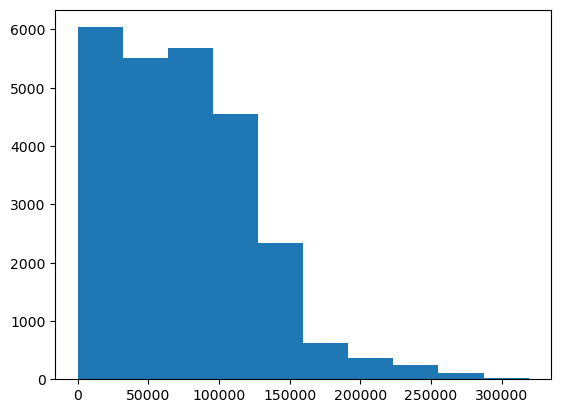

In [3]:
wage_data=visa_df['prevailing_wage']
plt.hist(wage_data)
plt.show()

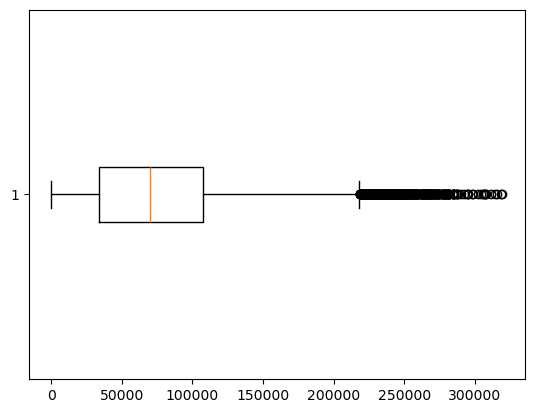

In [4]:
plt.boxplot(wage_data,vert=False)
plt.show()

<Axes: >

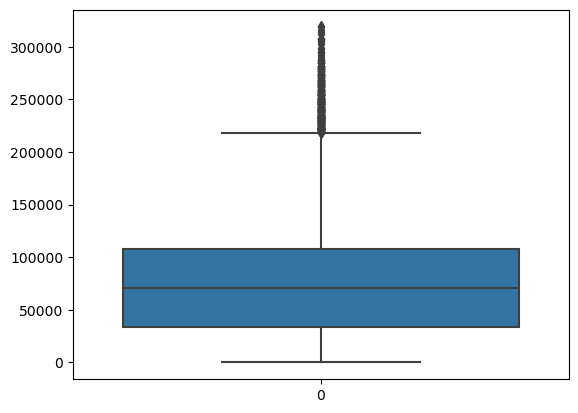

In [5]:
sns.boxplot(wage_data)

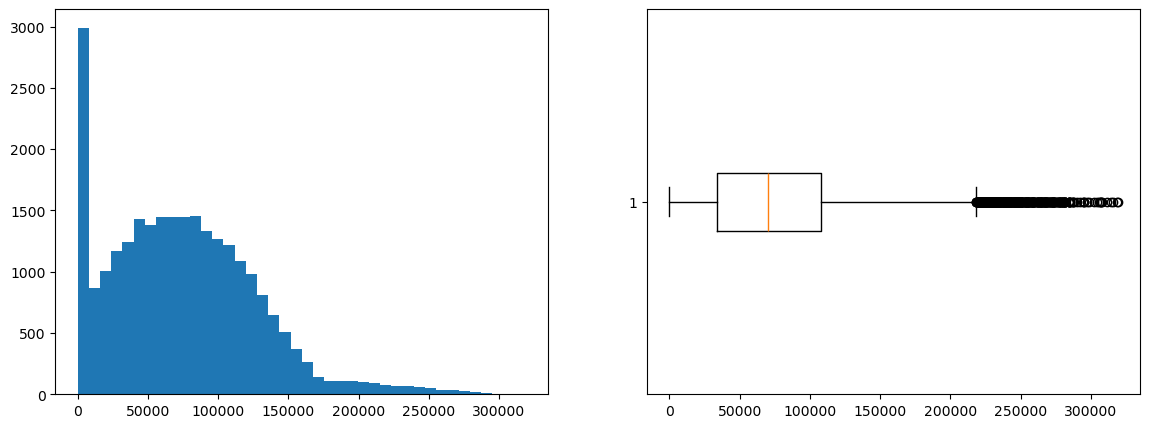

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(wage_data,bins=40)
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.show()

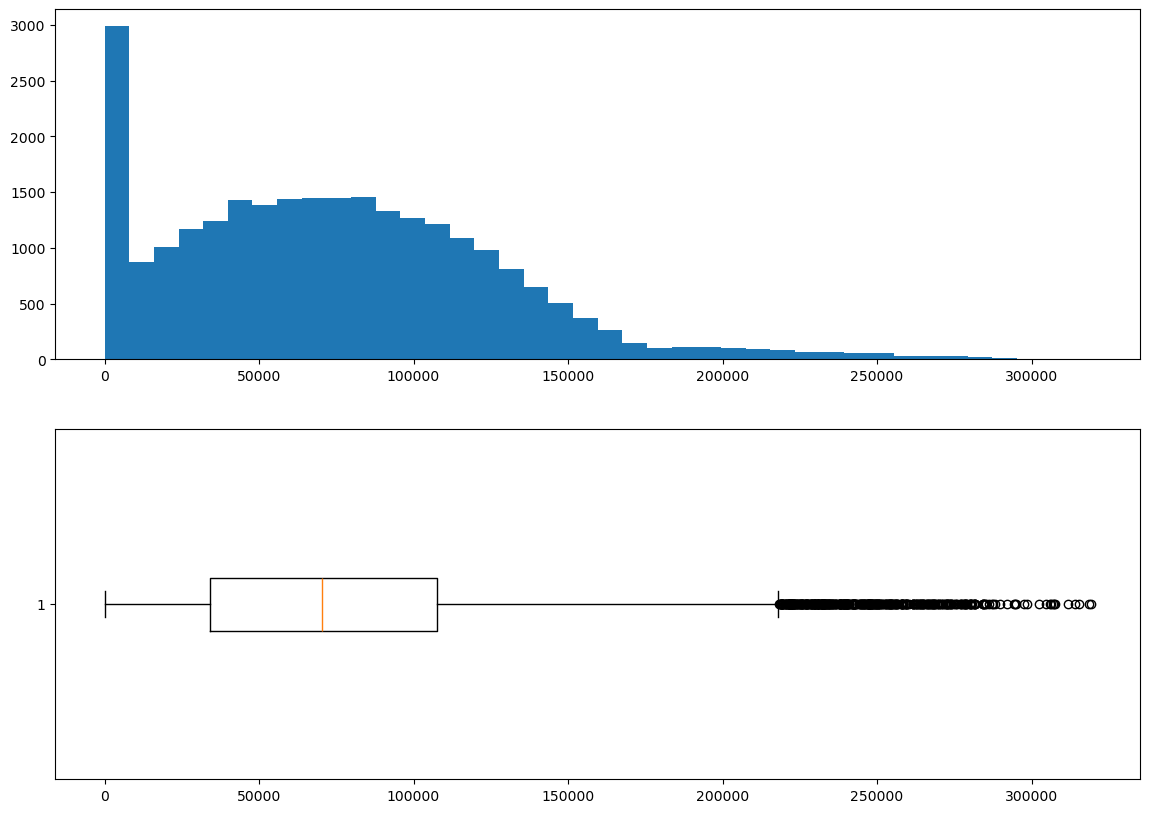

In [12]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1).hist(wage_data,bins=40)
plt.subplot(2,1,2).boxplot(wage_data,vert=False)
plt.show()

<Axes: >

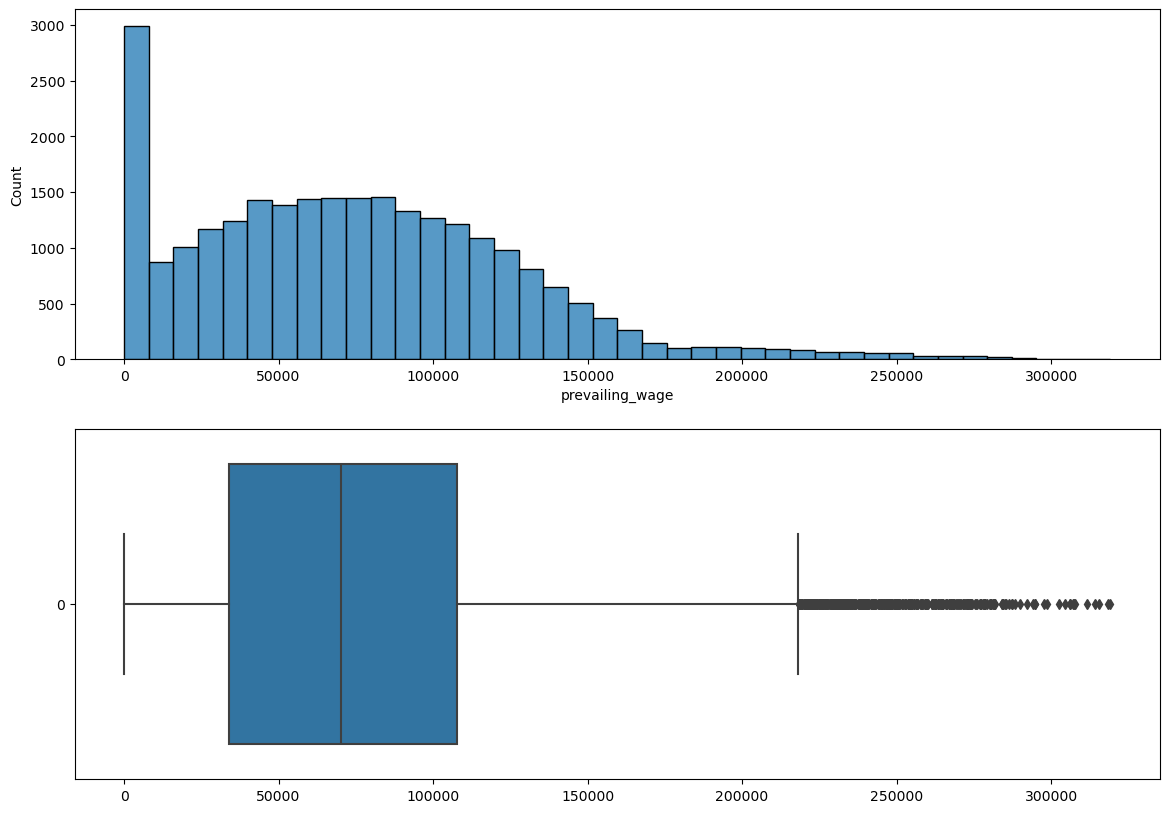

In [14]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.histplot(wage_data,bins=40)
plt.subplot(2,1,2)
sns.boxplot(wage_data,orient='h')

- Find number of outliers

- Get outliers data and without outliers data

In [37]:
q1=np.percentile(wage_data,25)
q3=np.percentile(wage_data,75)
iqr=q3-q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

con1 =wage_data<lb
con2=wage_data>ub
con =con1 | con2
outliers_df=visa_df[con]
len(visa_df[con])

427

In [19]:
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [21]:
q1=np.percentile(wage_data,25)
q3=np.percentile(wage_data,75)
iqr=q3-q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

con1 =wage_data>lb
con2=wage_data<ub
con =con1 & con2
non_outlier_data=visa_df[con]
len(visa_df[con])


25053

In [23]:
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


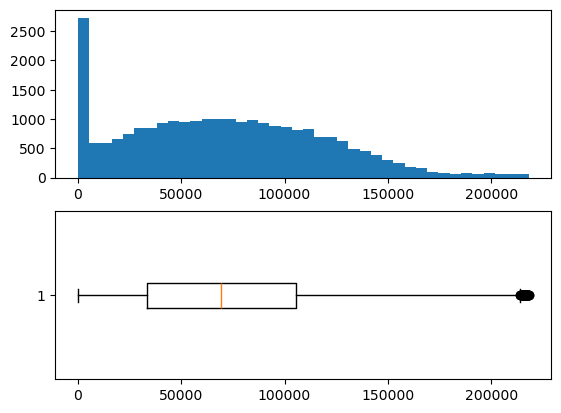

In [35]:
plt.subplot(2,1,1).hist(non_outlier_data['prevailing_wage'],bins=40)
plt.subplot(2,1,2).boxplot(non_outlier_data['prevailing_wage'],vert=False)
plt.show()

**fill the outliers with median**

In [53]:
wage_data=visa_df['prevailing_wage'].values
wage_data_outliers=outliers_df['prevailing_wage'].values

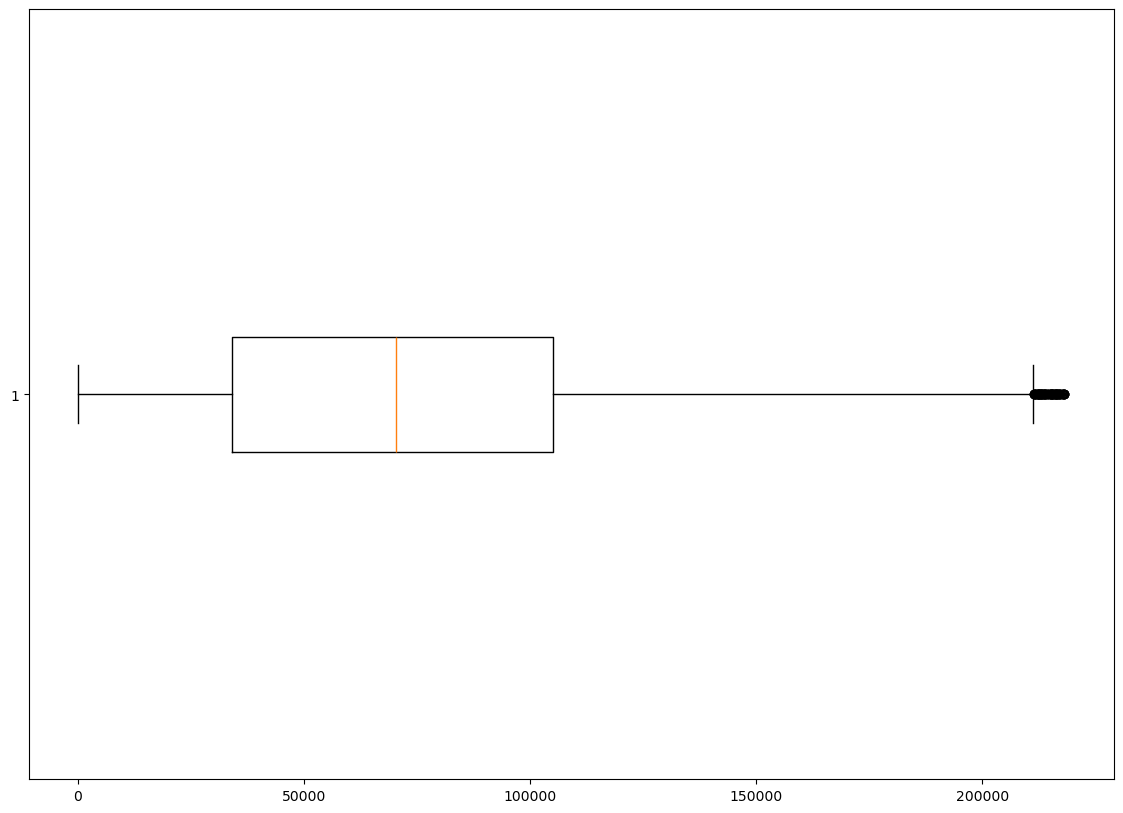

In [75]:
#visa_df
#non_outliers_data
#outliers_df
median=np.median(wage_data)
list1=[]
for i in wage_data:
    if i in wage_data_outliers:
        list1.append(median)
    else:
        list1.append(i)

new=pd.DataFrame(list1)
plt.figure(figsize=(14,10))
plt.boxplot(list1,vert=False)
plt.show()